# Forecasting oro

## Librerias

In [94]:
## Librerias
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

## Importe de datos/archivo

In [95]:
dataFrameGold = pd.read_csv('gold_price_data.csv') # se importa el archivo con los datos a trabajar
print(dataFrameGold.columns) # se imprime el analisis del archivo en un formato de columnas 
dataFrameGold.describe() # se realizara un analisis de los datos dentro del archivo // se ubica debajo del print para que esta info sea la que se muestra

Index(['Date', 'Value'], dtype='object')


,Value
count,10787.000000
mean,653.596634
std,434.030848
min,35.100000
25%,349.200000
50%,409.350000
75%,1061.625000
max,1895.000000


In [96]:
print(dataFrameGold.dtypes) #se imprime el tipo de datos que tiene el archivo en cuestion
dataFrameGold.head(10) #se escogen los datos del archivo a ser mostrados 
print(dataFrameGold.Value[2:10]) # prueba 

Date      object
Value    float64
dtype: object
2    35.4
3    36.2
4    37.4
5    38.9
6    40.1
7    42.0
8    43.5
9    48.3
Name: Value, dtype: float64


## Desarrollo

In [97]:
# Creacion de variables
etiqueta = np.array(dataFrameGold['Value'])[2:]
caract_m0 = np.array(dataFrameGold['Value'])[1:-1]
caract_m1 = np.array(dataFrameGold['Value'])[:-2]
print(len(etiqueta))
print(len(caract_m0))
print(len(caract_m1))

10785
10785
10785


In [98]:
# "La presente funcion recibe dos arrgelos tipo numpy " Se hace la funcion de costo "WOW SE CREO UNA FUNCION"
#  retorna una variable de tipo np
def funCosto(arr_1, arr_2):
  J=np.power(arr_1-arr_2,2) # aqui se realiza la resta y esto es permitido gracias a numpy y se usa numpypower para elevarlo al cuadrado
  return np.sum(J)/(2*len(J)) # error cuadratico medio

In [100]:
# Creacion de GridSearch

#1. Valores de thetao y theta 1
dict_resultados=dict()
for theta_0 in np.arange(0,5,1/100): # valores de 0 a 2 con pasos de 5/10 
  for theta_1 in np.arange(0,5,1/100): # estos dos for son para crear la grilla para theta_0 y theta 1 y asi tener los puntos a evaluar

    #2. Encontrar h(x)
    h_x= theta_0*caract_m1 + theta_1*caract_m0

    #3 Evaluar la funcion de costo
       # aqui se guarda el valor de la funcion de costo en el diccionario y se ponen las variables detnro de la llave o key
    dict_resultados[(theta_0,theta_1)]=funCosto(h_x,etiqueta)

#4. Encontrar el menor
parameters=list(dict_resultados.keys())
#print(parametros)

costValues = np.array(list(dict_resultados.values()))
#print(costValues)

indexMinCost = costValues.argmin()
print(indexMinCost)
bestParameters = parameters[indexMinCost]

print("Los mejores parametros son:" , bestParameters, "donde la función de costo retorno: ", costValues[indexMinCost]) 

599
Los mejores parametros son: (0.01, 0.99) donde la función de costo retorno:  40.80340153266389


Los mejores parametros son: (0.01, 0.99) donde la funcion de costo retornó: 40.80340153266389


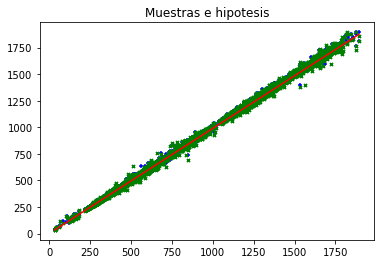

In [101]:
print("Los mejores parametros son:", bestParameters, "donde la funcion de costo retornó:", costValues[indexMinCost])
plt.scatter(caract_m0,etiqueta, s= 20, c="blue", marker="+")
plt.scatter(caract_m1,etiqueta, s= 10, c="green", marker="x")
x = np.arange(caract_m0.min(), caract_m0.max(), (caract_m0.max()-caract_m0.min())/1000)
plt.plot(x, bestParameters[0]+bestParameters[1]*x,'r-')
plt.title("Muestras e hipotesis")
plt.show()

Text(0.5, 0, 'Cost')

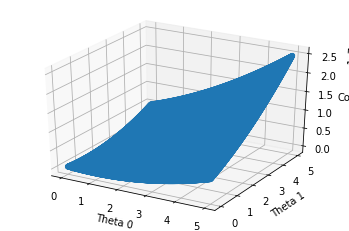

In [102]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D([p[0] for p in parameters], [p[1] for p in parameters], list(dict_resultados.values()))
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')